In [8]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math as m
import yfinance as yf
import breeze_connect
from breeze_connect import BreezeConnect

import sys
sys.path.append("/home/ganesh/Github/markets")
from core.functions.breeze import *

print("Imported necessary libraries")

Imported necessary libraries


In [9]:
fetcher = Fetcher(7734262)

In [10]:
finnifty = fetcher.get_ohlcv("NIFFIN", "1day", "2018-04-01", "2023-03-31")
finnifty

,datetime,open,high,low,close,volume
0,2018-04-02 12:04:00,10199.75,10273.45,10157.95,10261.35,0.0
1,2018-04-03 12:04:00,10248.15,10326.55,10227.65,10311.45,0.0
2,2018-04-04 12:04:00,10317.65,10346.50,10143.35,10169.25,0.0
3,2018-04-05 12:04:00,10268.25,10432.65,10265.60,10414.55,0.0
4,2018-04-06 12:04:00,10424.30,10482.90,10388.10,10468.15,0.0
...,...,...,...,...,...,...
1236,2023-03-24 12:03:00,17688.65,17788.45,17579.95,17623.40,0.0
1237,2023-03-27 12:03:00,17659.80,17727.95,17555.50,17616.05,0.0
1238,2023-03-28 12:03:00,17668.45,17698.25,17589.15,17664.45,0.0
1239,2023-03-29 12:03:00,17702.95,17856.40,17693.95,17793.85,0.0


In [11]:
finnifty.shape

(1241, 6)

In [12]:
finnifty.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [13]:
finnifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1241 non-null   datetime64[ns]
 1   open      1241 non-null   float64       
 2   high      1241 non-null   float64       
 3   low       1241 non-null   float64       
 4   close     1241 non-null   float64       
 5   volume    1241 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 58.3 KB


In [17]:
finnifty["range_hl"] = finnifty["high"] - finnifty["low"]
finnifty["range_oc"] = abs(finnifty["open"] - finnifty["close"])
finnifty.tail()

,datetime,open,high,low,close,volume,range_hl,range_oc
1236,2023-03-24 12:03:00,17688.65,17788.45,17579.95,17623.40,0.0,208.50,65.25
1237,2023-03-27 12:03:00,17659.80,17727.95,17555.50,17616.05,0.0,172.45,43.75
1238,2023-03-28 12:03:00,17668.45,17698.25,17589.15,17664.45,0.0,109.10,4.00
1239,2023-03-29 12:03:00,17702.95,17856.40,17693.95,17793.85,0.0,162.45,90.90
1240,2023-03-31 12:03:00,17924.15,18090.25,17903.70,18058.70,0.0,186.55,134.55


In [19]:
finnifty[["range_hl", 'range_oc']].describe()

,range_hl,range_oc
count,1241.000000,1241.000000
mean,233.025665,121.874658
std,148.756421,118.750065
min,43.700000,0.100000
25%,139.400000,40.150000
50%,197.050000,90.900000
75%,290.300000,162.500000
max,2026.950000,1271.350000


<AxesSubplot:xlabel='range_hl', ylabel='Count'>

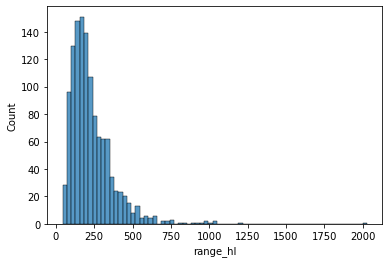

In [28]:
sns.histplot(finnifty["range_hl"])

In [29]:
finnifty["prev_close"] = finnifty["close"].shift(1)
finnifty

,datetime,open,high,low,close,volume,range_hl,range_oc,prev_close
0,2018-04-02 12:04:00,10199.75,10273.45,10157.95,10261.35,0.0,115.50,61.60,NaN
1,2018-04-03 12:04:00,10248.15,10326.55,10227.65,10311.45,0.0,98.90,63.30,10261.35
2,2018-04-04 12:04:00,10317.65,10346.50,10143.35,10169.25,0.0,203.15,148.40,10311.45
3,2018-04-05 12:04:00,10268.25,10432.65,10265.60,10414.55,0.0,167.05,146.30,10169.25
4,2018-04-06 12:04:00,10424.30,10482.90,10388.10,10468.15,0.0,94.80,43.85,10414.55
...,...,...,...,...,...,...,...,...,...
1236,2023-03-24 12:03:00,17688.65,17788.45,17579.95,17623.40,0.0,208.50,65.25,17746.55
1237,2023-03-27 12:03:00,17659.80,17727.95,17555.50,17616.05,0.0,172.45,43.75,17623.40
1238,2023-03-28 12:03:00,17668.45,17698.25,17589.15,17664.45,0.0,109.10,4.00,17616.05
1239,2023-03-29 12:03:00,17702.95,17856.40,17693.95,17793.85,0.0,162.45,90.90,17664.45


In [31]:
finnifty["gap_at_open"] = finnifty["open"] - finnifty["prev_close"]
finnifty

,datetime,open,high,low,close,volume,range_hl,range_oc,prev_close,gap_at_open
0,2018-04-02 12:04:00,10199.75,10273.45,10157.95,10261.35,0.0,115.50,61.60,NaN,NaN
1,2018-04-03 12:04:00,10248.15,10326.55,10227.65,10311.45,0.0,98.90,63.30,10261.35,-13.20
2,2018-04-04 12:04:00,10317.65,10346.50,10143.35,10169.25,0.0,203.15,148.40,10311.45,6.20
3,2018-04-05 12:04:00,10268.25,10432.65,10265.60,10414.55,0.0,167.05,146.30,10169.25,99.00
4,2018-04-06 12:04:00,10424.30,10482.90,10388.10,10468.15,0.0,94.80,43.85,10414.55,9.75
...,...,...,...,...,...,...,...,...,...,...
1236,2023-03-24 12:03:00,17688.65,17788.45,17579.95,17623.40,0.0,208.50,65.25,17746.55,-57.90
1237,2023-03-27 12:03:00,17659.80,17727.95,17555.50,17616.05,0.0,172.45,43.75,17623.40,36.40
1238,2023-03-28 12:03:00,17668.45,17698.25,17589.15,17664.45,0.0,109.10,4.00,17616.05,52.40
1239,2023-03-29 12:03:00,17702.95,17856.40,17693.95,17793.85,0.0,162.45,90.90,17664.45,38.50


In [32]:
finnifty["gap_at_open"].describe()

count    1240.000000
mean       14.949355
std       115.934333
min      -973.550000
25%       -22.412500
50%        21.725000
75%        66.300000
max       621.500000
Name: gap_at_open, dtype: float64

<AxesSubplot:xlabel='gap_at_open', ylabel='Count'>

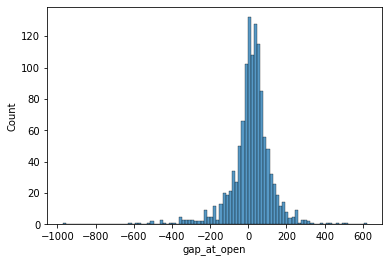

In [33]:
sns.histplot(finnifty["gap_at_open"])